In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using plaidml.keras.backend backend.


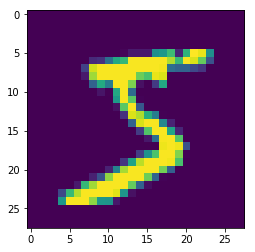

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
#check image shape
X_train[0].shape

(28, 28)

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(10, kernel_size=5, strides=(2, 2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

INFO:plaidml:Opening device "opencl_amd_mullins.0"


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 12, 12, 10)        260       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 11,180
Trainable params: 11,180
Non-trainable params: 0
_________________________________________________________________


$ (3*3+1)*64=640 $ 

$ 32*(64*3*3+1)=18464 $

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_3.png')

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])

In [ ]:
#actual results for first 4 images in test set
y_test[:4]

In [ ]:
model.save('MNIST_Keras_3.h5')

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()